<a href="https://colab.research.google.com/github/Hou-jing/deep-learning_HW-liuxinfeng-teacher-/blob/main/%E6%89%8B%E5%86%99%E6%95%B0%E5%AD%97%E8%AF%86%E5%88%AB%E6%A8%A1%E5%9E%8B%E6%9E%B6%E6%9E%84%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 设置环境

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchsummary import summary

###参数设置

In [ ]:
n_epochs = 8
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 100
random_seed = 1
torch.manual_seed(random_seed)

### 准备数据集

In [ ]:
train_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 测试数据查看

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)
print(example_data.shape)

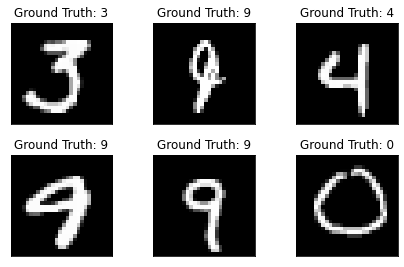

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

### 构建网络一

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

### 构建网络模型二

In [ ]:
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.fc1 = nn.Linear(500, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 500)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net_2()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
summary(network,(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 20, 11, 11]           1,820
            Linear-3                   [-1, 50]          25,050
            Linear-4                   [-1, 10]             510
Total params: 27,480
Trainable params: 27,480
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.10
Estimated Total Size (MB): 0.18
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


注意：pytorch中，padding默认=0，在池化操作中，默认stride=2，可以按照卷积计算维度的公式的计算

### 构建网络模型三

In [ ]:
class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv3 = nn.Conv2d(20, 10, kernel_size=3)
        self.fc1 = nn.Linear(10*11*11, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = F.relu(F.max_pool2d(x, 2))
        x = x.view(-1,10*11*11 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net_3()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
summary(network,(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 20, 24, 24]           1,820
            Conv2d-3           [-1, 10, 22, 22]           1,810
            Linear-4                   [-1, 50]          60,550
            Linear-5                   [-1, 10]             510
Total params: 64,790
Trainable params: 64,790
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.25
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


### 网络架构四

In [ ]:
class Net_4(nn.Module):
    def __init__(self):
        super(Net_4, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv3 = nn.Conv2d(20, 10, kernel_size=3)
        self.fc1 = nn.Linear(10*11*11, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = F.relu(F.max_pool2d(x, 2))
        x = x.view(-1,10*11*11 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net_4()
optimizer = optim.AdamW(network.parameters(), lr=learning_rate)
summary(network,(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 20, 24, 24]           1,820
            Conv2d-3           [-1, 10, 22, 22]           1,810
            Linear-4                   [-1, 50]          60,550
            Linear-5                   [-1, 10]             510
Total params: 64,790
Trainable params: 64,790
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.25
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


注意：pytorch中，padding默认=0，在池化操作中，默认stride=2，可以按照卷积计算维度的公式的计算

### 优化器

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)


In [ ]:
summary(network,(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
         Dropout2d-3             [-1, 20, 8, 8]               0
            Linear-4                   [-1, 50]          16,050
            Linear-5                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


### 模型训练

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')
          


In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
test()    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0524, Accuracy: 9838/10000 (98.380%)



In [ ]:
for epoch in range(1, n_epochs+1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.372890
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.453831
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.390715
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.478280
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.391882
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.316403
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.305887
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.622306
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.335490
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.293966


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1255, Accuracy: 9615/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.445382
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.415876
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.291864
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.429226
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.301635
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.191860
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.465169
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.453712
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.370130
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.367954

Test set: Avg. loss: 0.1009, Accuracy: 9685/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.197139
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.504906
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.260623
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.265555
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.298382
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.076979
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.329844
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.136

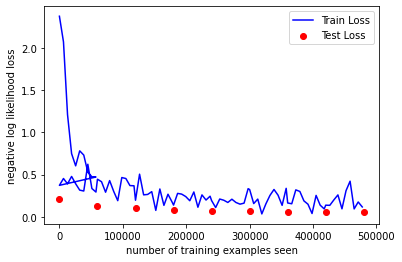

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

### 模型训练_2

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')
          


In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


In [ ]:
for epoch in range(1, n_epochs+1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.277658
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.485101
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.815760
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.824190
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.706446
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.540653
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.572810
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.359455
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.671678
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.380221


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1860, Accuracy: 9469/10000 (94.690%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.288084
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.337717
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.341246
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.324009
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.373131
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.168811
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.248331
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.209213
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.261321
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.296789

Test set: Avg. loss: 0.1090, Accuracy: 9653/10000 (96.530%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.267066
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.146888
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.133936
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.235841
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.291745
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.148492
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.226648
Train Epoch: 3 [44800/60000 (75%)]	Los

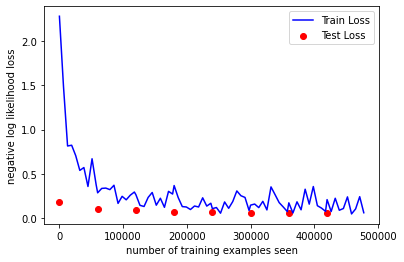

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter[:len(test_losses)], test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

### 模型三训练

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')
          


In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


In [ ]:
for epoch in range(1, n_epochs+1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.290818
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.041038
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.735073
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.989259
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.384372
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.653352
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.508916
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.418054
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.407703
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.362948


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.2211, Accuracy: 9348/10000 (93.480%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.598083
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.340245
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.392647
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.541058
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.238450
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.378628
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.183998
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.295874
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.222066
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.454896

Test set: Avg. loss: 0.1086, Accuracy: 9661/10000 (96.610%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.342378
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.320267
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.225643
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.239718
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.312017
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.150720
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.366980
Train Epoch: 3 [44800/60000 (75%)]	Los

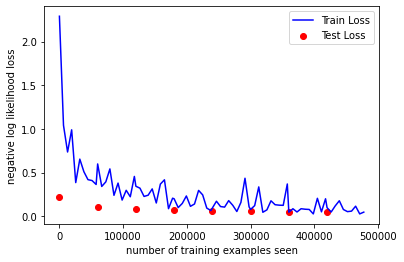

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter[:len(test_losses)], test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

### 模型训练_4

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()

  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')
          


In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


In [ ]:
for epoch in range(1, n_epochs+1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321292
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.554800
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.442387
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.486227
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.458296
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.376747
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.390654
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.377707
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.287812
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.381444


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.4488, Accuracy: 8819/10000 (88.190%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.598882
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.305676
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.302264
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.297354
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.323437
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.306930
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.305367
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.302008
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.300599
Train Epoch: 2 [57600/60000 (96%)]	Loss: 2.297402

Test set: Avg. loss: 2.3020, Accuracy: 1135/10000 (11.350%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.297760
Train Epoch: 3 [6400/60000 (11%)]	Loss: 2.318817
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.297052
Train Epoch: 3 [19200/60000 (32%)]	Loss: 2.298049
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.301482
Train Epoch: 3 [32000/60000 (53%)]	Loss: 2.295382
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.304441
Train Epoch: 3 [44800/60000 (75%)]	Los

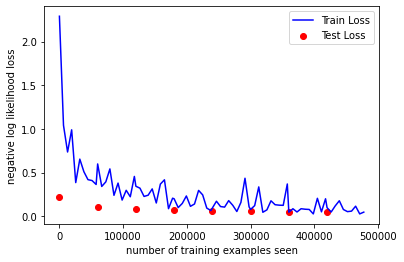

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter[:len(test_losses)], test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()